# Income Bracket 2019

In [1]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import json

In [2]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [3]:
# Run Census Search to retrieve data on all states (2016 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        #"B19001_001E",
        #"B19001_002E",
        #"B19001_003E",
        #"B19001_004E",
        #"B19001_005E",
        #"B19001_006E",
        #"B19001_007E",
        #"B19001_008E",
        #"B19001_009E",
        #"B19001_010E",
        "B19001_011E",
        "B19001_012E",
        "B19001_013E",
        #"B19001_014E",
        #"B19001_015E",
        #"B19001_016E",
        #"B19001_017E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
Income_Bracket_2019 = pd.DataFrame(census_data)

# Column renaming
Income_Bracket_2019 = Income_Bracket_2019.rename(
    columns = {
        #"B19001_001E": "Household Income Total",
        #"B19001_002E": "Household Income Less than 10,000",
        #"B19001_003E": "Household Income 10,000 to 14,999",
        #"B19001_004E": "Household Income 15,000 to 19,999",
        #"B19001_005E": "Household Income 20,000 to 24,999",
        #"B19001_006E": "Household Income 25,000 to 29,999",
        #"B19001_007E": "Household Income 30,000 to 34,999",
        #"B19001_008E": "Household Income 35,000 to 39,999",
        #"B19001_009E": "Household Income 40,000 to 44,999",
        #"B19001_010E": "Household Income 45,000 to 49,999",
        "B19001_011E": "Household Income 50,000 to 59,999",
        "B19001_012E": "Household Income 60,000 to 74,999",
        "B19001_013E": "Household Income 75,000 to 99,999",
        #"B19001_014E": "Household Income 100,000 to 124,999",
        #"B19001_015E": "Household Income 125,000 to 149,999",
        #"B19001_016E": "Household Income 150,000 to 199,999",
        #"B19001_017E": "Household Income 200,000 or more",
        "NAME": "State"
    }
)

# Combine two Income Brackets to one column column
#Income_Bracket_2019["Household Income 10,000 to 49,999"] = (Income_Bracket_2019["Household Income 10,000 to 14,999"] + Income_Bracket_2019["Household Income 15,000 to 19,999"]
                                                        #   + Income_Bracket_2019["Household Income 20,000 to 24,999"] + Income_Bracket_2019["Household Income 25,000 to 29,999"]
                                                         #  + Income_Bracket_2019["Household Income 30,000 to 34,999"] + Income_Bracket_2019["Household Income 35,000 to 39,999"]
                                                          # + Income_Bracket_2019["Household Income 40,000 to 44,999"] + Income_Bracket_2019["Household Income 45,000 to 49,999"]) / 2
Income_Bracket_2019["Household Income 50,000 to 99,999"] = (Income_Bracket_2019["Household Income 50,000 to 59,999"] + Income_Bracket_2019["Household Income 60,000 to 74,999"]
                                                           + Income_Bracket_2019["Household Income 75,000 to 99,999"] ) / 2
#Income_Bracket_2019["Household Income 100,000 to 199,999"] = (Income_Bracket_2019["Household Income 100,000 to 124,999"] + Income_Bracket_2019["Household Income 125,000 to 149,999"]
                                                           # +Income_Bracket_2019["Household Income 150,000 to 199,999"] ) / 2

# Configure the final DataFrame
Income_Bracket_2019 = Income_Bracket_2019[
    [
        "State",
        #"Household Income Total",
        #"Household Income Less than 10,000",
       # "Household Income 10,000 to 49,999",
        "Household Income 50,000 to 99,999",
       # "Household Income 100,000 to 199,999",
        #"Household Income 200,000 or more"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(Income_Bracket_2019)}")
Income_Bracket_2019

Number of rows in the DataFrame: 52


,State,"Household Income 50,000 to 99,999"
0,Alabama,272602.5
1,Alaska,40033.5
2,Arizona,404426.0
3,Arkansas,169288.0
4,California,1821642.0
5,Colorado,335874.0
6,Delaware,58395.5
7,District of Columbia,32467.0
8,Connecticut,189571.5
9,Florida,1186837.5


In [4]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_bracket = Income_Bracket_2019[Income_Bracket_2019["State"].isin(selected_states)]
selected_bracket

,State,"Household Income 50,000 to 99,999"
4,California,1821642.0
9,Florida,1186837.5
13,Illinois,715836.5
32,New York,997992.5
43,Texas,1459582.5


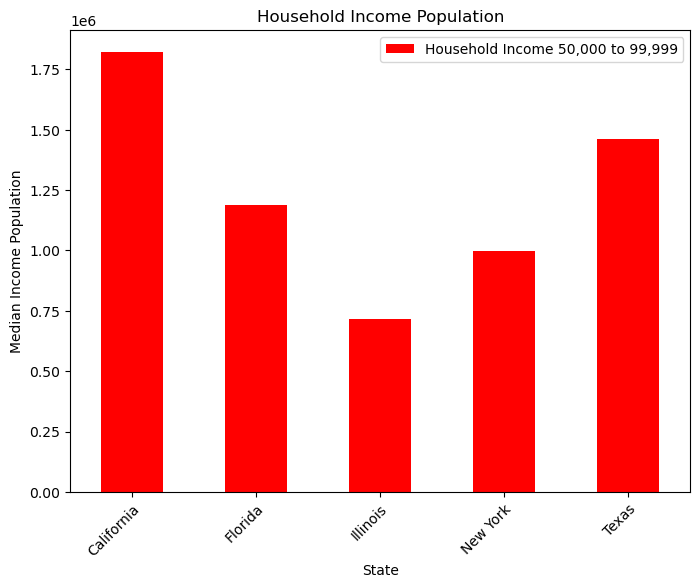

In [7]:
figure10 = selected_bracket.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                           title="Household Income Population",
                           xlabel="State",
                           ylabel="Median Income Population")

figure10.set_xticklabels(selected_bracket['State'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig10.png")
plt.show()

In [ ]:
line_plot = selected_bracket.loc[selected_bracket["Household Income 50,000 to 99,999"]]
x_axis = line_plot["State"]
y_axis = line_plot["Household Income 50,000 to 99,999"]

tumor_volume = plt.plot(x_axis, y_axis, marker="+", color="blue", linewidth =1, label="Timepoint")
plt.xlabel("State")
plt.ylabel("Household Income 50,000 to 99,999")
plt.show()